In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [5]:
df = pd.read_excel('n_data.xlsx')

In [6]:
df.shape

(14999, 10)

In [7]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [11]:
df1=df1.rename(columns = {'stag':'Experience'})

In [8]:
df=df.rename(columns = {'sales':'department'})

In [9]:
df.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium


In [29]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [13]:
df[df.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [25]:
df[df.duplicated(subset=df.columns,keep='first')]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [30]:
df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

<AxesSubplot:>

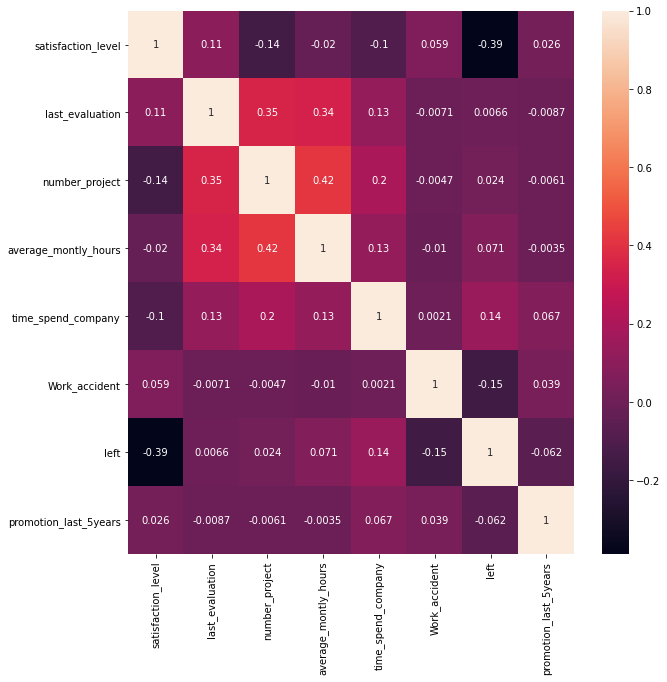

In [31]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [53]:
df.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium


In [56]:
df['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [57]:
df['number_project'].unique()

array([2, 5, 7, 6, 4, 3], dtype=int64)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='number_project', ylabel='count'>

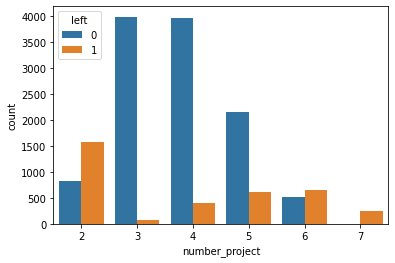

In [58]:
sns.countplot(df['number_project'],hue=df['left'])

In [32]:
(df['left'].value_counts()/df.shape[0])*100

0    76.191746
1    23.808254
Name: left, dtype: float64

In [60]:
df.shape

(14999, 10)

In [76]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [33]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='left', ylabel='count'>

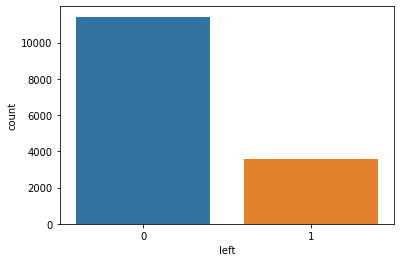

In [34]:
sns.countplot(df['left'])

In [35]:
df.iplot(kind = 'box')

In [36]:
df.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium


In [10]:
def transformation_plot(df,variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    df[variable].hist()
    
    plt.subplot(1,2,2)
    stats.probplot(df[variable],dist='norm',plot = plt)
    plt.show()

# To show the probablity plot

In [11]:
def impute(df,variable):
    print('1.Mean\n2.Median')
    a = int(input())
    if a == 1:
        df[variable].fillna(df[variable].mean(),inplace =True)
    elif a == 2:
        df[variable].fillna(df[variable].median(),inplace = True)
    else:
        pass
    return df[variable]

# To impute the values with mean and median if there are any missing values

In [12]:
def missing_values(df):
    missing_vals = df.isnull().sum()
    missing_values_per = 100 * df.isnull().sum() / len(df)
    missing_valu_table = pd.concat([missing_vals,missing_values_per], axis = 1)
    miss_vals_table_renamed = missing_valu_table.rename(columns = {0: 'Missing Values' , 1 : 'Percentage of Missing'})
    miss_vals_table_renamed = miss_vals_table_renamed[
       miss_vals_table_renamed.iloc[:,1] != 0].sort_values('Percentage of Missing',ascending = False).round(2)
    
    return miss_vals_table_renamed

# To find out the missing values with percentage values.

In [13]:
missing_values(df)

,Missing Values,Percentage of Missing


# No missing values in our data set

In [13]:
df.head(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low


<AxesSubplot:xlabel='satisfaction_level', ylabel='Density'>

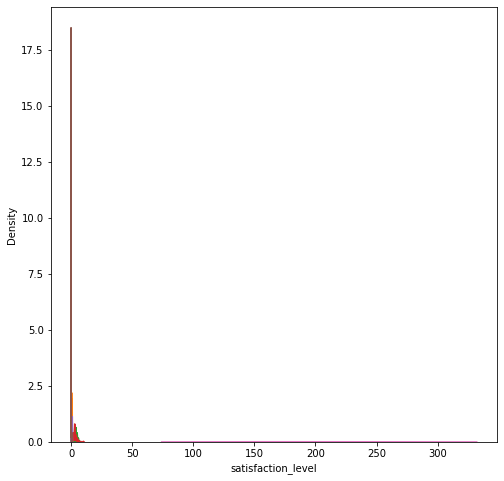

In [14]:
plt.figure(figsize=(8,8))
sns.kdeplot(df['satisfaction_level'])
sns.kdeplot(df['last_evaluation'])
sns.kdeplot(df['number_project'])
sns.kdeplot(df['time_spend_company'])
sns.kdeplot(df['Work_accident'])
sns.kdeplot(df['promotion_last_5years'])
sns.kdeplot(df['average_montly_hours'])

# From the above figure we can say that the data got different units so we have to go for standardization in order to get them on the same page.

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='department', ylabel='count'>

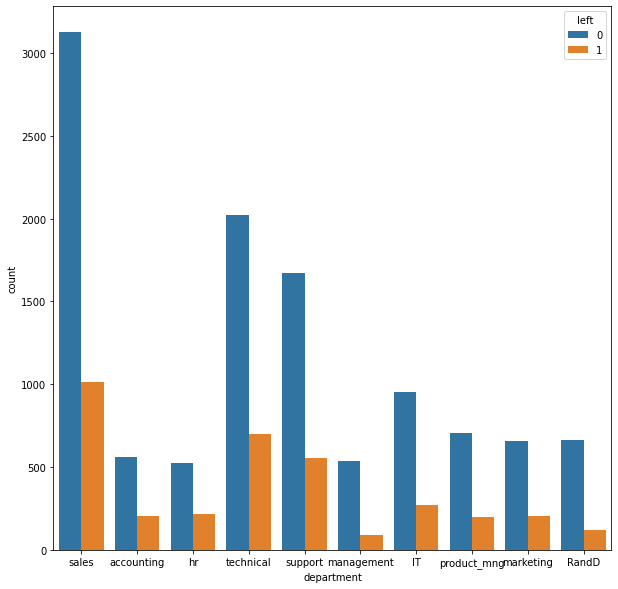

In [15]:
plt.figure(figsize=(10,10))
sns.countplot(df['department'],hue=df['left'])

In [15]:
l1 = df['department'].where(df['left']== 1).value_counts()

In [16]:
l1

sales          1014
technical       697
support         555
IT              273
hr              215
accounting      204
marketing       203
product_mng     198
RandD           121
management       91
Name: department, dtype: int64

In [17]:
l2 = df['department'].where(df['left'] == 0).value_counts()

In [18]:
l2

sales          3126
technical      2023
support        1674
IT              954
product_mng     704
RandD           666
marketing       655
accounting      563
management      539
hr              524
Name: department, dtype: int64

In [19]:
total = df['department'].count()

In [20]:
total

14999

In [21]:
df3 = pd.merge(l1,l2,right_index=True,left_index=True,suffixes=('_Yes','_No'))

In [22]:
df3

,department_Yes,department_No
sales,1014,3126
technical,697,2023
support,555,1674
IT,273,954
hr,215,524
accounting,204,563
marketing,203,655
product_mng,198,704
RandD,121,666
management,91,539


In [23]:
df3['Total'] = df3['department_Yes'] + df3['department_No']

In [24]:
df3

,department_Yes,department_No,Total
sales,1014,3126,4140
technical,697,2023,2720
support,555,1674,2229
IT,273,954,1227
hr,215,524,739
accounting,204,563,767
marketing,203,655,858
product_mng,198,704,902
RandD,121,666,787
management,91,539,630


In [25]:
df3['Percentage_of_left'] = df3['department_Yes'] / df3['Total']*100

In [26]:
df3['Percentage_of_stayed'] = df3['department_No'] / df3['Total']*100

In [27]:
df3

,department_Yes,department_No,Total,Percentage_of_left,Percentage_of_stayed
sales,1014,3126,4140,24.492754,75.507246
technical,697,2023,2720,25.625000,74.375000
support,555,1674,2229,24.899058,75.100942
IT,273,954,1227,22.249389,77.750611
hr,215,524,739,29.093369,70.906631
accounting,204,563,767,26.597132,73.402868
marketing,203,655,858,23.659674,76.340326
product_mng,198,704,902,21.951220,78.048780
RandD,121,666,787,15.374841,84.625159
management,91,539,630,14.444444,85.555556


In [28]:
df3.sort_values('Percentage_of_left',ascending = False)

,department_Yes,department_No,Total,Percentage_of_left,Percentage_of_stayed
hr,215,524,739,29.093369,70.906631
accounting,204,563,767,26.597132,73.402868
technical,697,2023,2720,25.625000,74.375000
support,555,1674,2229,24.899058,75.100942
sales,1014,3126,4140,24.492754,75.507246
marketing,203,655,858,23.659674,76.340326
IT,273,954,1227,22.249389,77.750611
product_mng,198,704,902,21.951220,78.048780
RandD,121,666,787,15.374841,84.625159
management,91,539,630,14.444444,85.555556


# From the above data I can infer that the HR department has got the highest left rate of 29.09 %

# Management department has got the highest retention rate of 85.55 %

In [29]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [30]:
df['satisfaction_level'].unique()

array([0.38, 0.8 , 0.11, 0.72, 0.37, 0.41, 0.1 , 0.92, 0.89, 0.42, 0.45,
       0.84, 0.36, 0.78, 0.76, 0.09, 0.46, 0.4 , 0.82, 0.87, 0.57, 0.43,
       0.13, 0.44, 0.39, 0.85, 0.81, 0.9 , 0.74, 0.79, 0.17, 0.24, 0.91,
       0.71, 0.86, 0.14, 0.75, 0.7 , 0.31, 0.73, 0.83, 0.32, 0.54, 0.27,
       0.77, 0.88, 0.48, 0.19, 0.6 , 0.12, 0.61, 0.33, 0.56, 0.47, 0.28,
       0.55, 0.53, 0.59, 0.66, 0.25, 0.34, 0.58, 0.51, 0.35, 0.64, 0.5 ,
       0.23, 0.15, 0.49, 0.3 , 0.63, 0.21, 0.62, 0.29, 0.2 , 0.16, 0.65,
       0.68, 0.67, 0.22, 0.26, 0.99, 0.98, 1.  , 0.52, 0.93, 0.97, 0.69,
       0.94, 0.96, 0.18, 0.95])

In [31]:
for i in range(len(df['satisfaction_level'])):
    if df['satisfaction_level'][i] in (0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19):
        df['satisfaction_level'][i] = 'Rating 1'
    elif df['satisfaction_level'][i] in (0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29):
        df['satisfaction_level'][i] = 'Rating 2'
    elif df['satisfaction_level'][i] in (0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39):
        df['satisfaction_level'][i] = 'Rating 3'
    elif df['satisfaction_level'][i] in (0.40,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49):
        df['satisfaction_level'][i] = 'Rating 4'
    elif df['satisfaction_level'][i] in (0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59):
        df['satisfaction_level'][i] = 'Rating 5'
    elif df['satisfaction_level'][i] in (0.60,0.61,0.62,0.63,0.64,0.65,0.66,0.67,0.68,0.69):
        df['satisfaction_level'][i] = 'Rating 6'
    elif df['satisfaction_level'][i] in (0.70,0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79):
        df['satisfaction_level'][i] = 'Rating 7'
    elif df['satisfaction_level'][i] in (0.80,0.81,0.82,0.83,0.84,0.85,0.86,0.87,0.88,0.89):
        df['satisfaction_level'][i] ='Rating 8'
    elif df['satisfaction_level'][i] in (0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99):
        df['satisfaction_level'][i] = 'Rating 9'
    else:
        df['satisfaction_level'][i] ='Rating 10'

In [32]:
df['satisfaction_level'].value_counts()

Rating 7     2279
Rating 8     2220
Rating 6     1960
Rating 5     1953
Rating 9     1893
Rating 4     1668
Rating 1     1214
Rating 3     1013
Rating 2      493
Rating 10     306
Name: satisfaction_level, dtype: int64

In [33]:
rating_10 = df[df['satisfaction_level'] == 'Rating 10']
rating_9 = df[df['satisfaction_level'] == 'Rating 9']
rating_8 = df[df['satisfaction_level'] == 'Rating 8']
rating_7 = df[df['satisfaction_level'] == 'Rating 7']
rating_6 = df[df['satisfaction_level'] == 'Rating 6']
rating_5 = df[df['satisfaction_level'] == 'Rating 5']
rating_4 = df[df['satisfaction_level'] == 'Rating 4']
rating_3 = df[df['satisfaction_level'] == 'Rating 3']
rating_2 = df[df['satisfaction_level'] == 'Rating 2']
rating_1 = df[df['satisfaction_level'] == 'Rating 1']
satisafaction_level = df['satisfaction_level'].value_counts().to_frame()
satisafaction_level

,satisfaction_level
Rating 7,2279
Rating 8,2220
Rating 6,1960
Rating 5,1953
Rating 9,1893
Rating 4,1668
Rating 1,1214
Rating 3,1013
Rating 2,493
Rating 10,306


In [34]:
left_count1=[]
left_count1.append(rating_10[rating_10['left']== 1 ].count()[1])

In [36]:
left_count1.append(rating_9[rating_9['left']== 1 ].count()[1])
left_count1.append(rating_8[rating_8['left']== 1 ].count()[1])
left_count1.append(rating_7[rating_7['left']== 1 ].count()[1])
left_count1.append(rating_6[rating_6['left']== 1 ].count()[1])
left_count1.append(rating_5[rating_5['left']== 1 ].count()[1])
left_count1.append(rating_4[rating_4['left']== 1 ].count()[1])
left_count1.append(rating_3[rating_3['left']== 1 ].count()[1])
left_count1.append(rating_2[rating_2['left']== 1 ].count()[1])
left_count1.append(rating_1[rating_1['left']== 1 ].count()[1])

In [37]:
left_count1 = [366,462,32,49,115,981,725,621,25,195]

In [38]:
satisafaction_level['left_count'] = left_count1

In [39]:
satisafaction_level

,satisfaction_level,left_count
Rating 7,2279,366
Rating 8,2220,462
Rating 6,1960,32
Rating 5,1953,49
Rating 9,1893,115
Rating 4,1668,981
Rating 1,1214,725
Rating 3,1013,621
Rating 2,493,25
Rating 10,306,195


<AxesSubplot:>

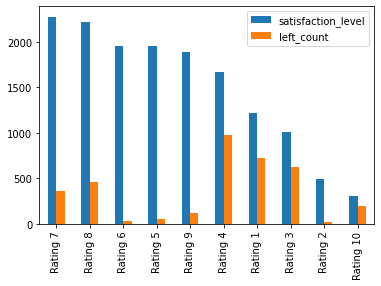

In [40]:
satisafaction_level.plot(kind='bar')

In [41]:
satisafaction_level['Percentage']=(satisafaction_level['left_count']/satisafaction_level['satisfaction_level'])*100
satisafaction_level.sort_values(by='Percentage',ascending=False)

,satisfaction_level,left_count,Percentage
Rating 10,306,195,63.725490
Rating 3,1013,621,61.303060
Rating 1,1214,725,59.719934
Rating 4,1668,981,58.812950
Rating 8,2220,462,20.810811
Rating 7,2279,366,16.059675
Rating 9,1893,115,6.075013
Rating 2,493,25,5.070994
Rating 5,1953,49,2.508961
Rating 6,1960,32,1.632653


# From the above data we can infer that the people with Higher satisfaction rating are also the one with highest left percentage

In [42]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,Rating 3,0.53,2,157,3,0,1,0,sales,low
1,Rating 8,0.86,5,262,6,0,1,0,sales,medium
2,Rating 1,0.88,7,272,4,0,1,0,sales,medium
3,Rating 7,0.87,5,223,5,0,1,0,sales,low
4,Rating 3,0.52,2,159,3,0,1,0,sales,low


In [54]:
def get_vif_factors(x):
    x_matrix = x.to_numpy()
    vif = [variance_inflation_factor(x_matrix,i) for i in range(x_matrix.shape[1])]
    vif_factors = pd.DataFrame()
    vif_factors['column'] = x.columns
    vif_factors['vif'] = vif
    return vif_factors;

# Variation Inflation Factor - This function is used to find the insignificant features.

In [44]:
for i in range(len(df['last_evaluation'])):
    if df['last_evaluation'][i] in (0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19):
        df['last_evaluation'][i] = 'Eval Score 1'
    elif df['last_evaluation'][i] in (0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29):
        df['last_evaluation'][i] = 'Eval Score 2'
    elif df['last_evaluation'][i] in (0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39):
        df['last_evaluation'][i] = 'Eval Score 3'
    elif df['last_evaluation'][i] in (0.40,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49):
        df['last_evaluation'][i] = 'Eval Score 4'
    elif df['last_evaluation'][i] in (0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59):
        df['last_evaluation'][i] = 'Eval Score 5'
    elif df['last_evaluation'][i] in (0.60,0.61,0.62,0.63,0.64,0.65,0.66,0.67,0.68,0.69):
        df['last_evaluation'][i] = 'Eval Score 6'
    elif df['last_evaluation'][i] in (0.70,0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79):
        df['last_evaluation'][i] = 'Eval Score 7'
    elif df['last_evaluation'][i] in (0.80,0.81,0.82,0.83,0.84,0.85,0.86,0.87,0.88,0.89):
        df['last_evaluation'][i] ='Eval Score 8'
    elif df['last_evaluation'][i] in (0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99):
        df['last_evaluation'][i] = 'Eval Score 9'
    else:
        df['last_evaluation'][i] ='Eval Score 10'

In [45]:
df['last_evaluation'].value_counts()

Eval Score 5     3174
Eval Score 8     2752
Eval Score 9     2705
Eval Score 7     2275
Eval Score 6     2242
Eval Score 4     1389
Eval Score 10     283
Eval Score 3      179
Name: last_evaluation, dtype: int64

In [46]:
score_10 = df[df['last_evaluation'] == 'Eval Score 10']
score_9 = df[df['last_evaluation'] == 'Eval Score 9']
score_8 = df[df['last_evaluation'] == 'Eval Score 8']
score_7 = df[df['last_evaluation'] == 'Eval Score 7']
score_6 = df[df['last_evaluation'] == 'Eval Score 6']
score_5 = df[df['last_evaluation'] == 'Eval Score 5']
score_4 = df[df['last_evaluation'] == 'Eval Score 4']
score_3 = df[df['last_evaluation'] == 'Eval Score 3']
scores = df['last_evaluation'].value_counts().to_frame()
scores

,last_evaluation
Eval Score 5,3174
Eval Score 8,2752
Eval Score 9,2705
Eval Score 7,2275
Eval Score 6,2242
Eval Score 4,1389
Eval Score 10,283
Eval Score 3,179


In [47]:
score_count=[]
score_count.append(score_10[score_10['left']== 1 ].count()[1])
score_count.append(score_9[score_9['left']== 1 ].count()[1])
score_count.append(score_8[score_8['left']== 1 ].count()[1])
score_count.append(score_7[score_7['left']== 1 ].count()[1])
score_count.append(score_6[score_6['left']== 1 ].count()[1])
score_count.append(score_5[score_5['left']== 1 ].count()[1])
score_count.append(score_4[score_4['left']== 1 ].count()[1])
score_count.append(score_3[score_3['left']== 1 ].count()[1])

In [48]:
score_count = [1019,786,789,170,51,589,167,0]

<AxesSubplot:>

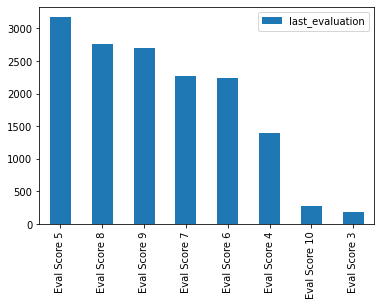

In [49]:
scores.plot(kind='bar')

In [50]:
scores['eval_score_count'] = score_count

In [51]:
scores

,last_evaluation,eval_score_count
Eval Score 5,3174,1019
Eval Score 8,2752,786
Eval Score 9,2705,789
Eval Score 7,2275,170
Eval Score 6,2242,51
Eval Score 4,1389,589
Eval Score 10,283,167
Eval Score 3,179,0


In [52]:
scores['Percentage']=(scores['eval_score_count']/scores['last_evaluation'])*100
scores.sort_values(by='Percentage',ascending=False)

,last_evaluation,eval_score_count,Percentage
Eval Score 10,283,167,59.010601
Eval Score 4,1389,589,42.404608
Eval Score 5,3174,1019,32.104600
Eval Score 9,2705,789,29.168207
Eval Score 8,2752,786,28.561047
Eval Score 7,2275,170,7.472527
Eval Score 6,2242,51,2.274755
Eval Score 3,179,0,0.000000


# From the above data I can infer that the people with Highest evaluation score are the one having highest left percentage as well i.e of 59% followed by evaluation score 4 with 42.4% and Evaluation score 5 witj 32.10%

In [53]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,Rating 3,Eval Score 5,2,157,3,0,1,0,sales,low
1,Rating 8,Eval Score 8,5,262,6,0,1,0,sales,medium
2,Rating 1,Eval Score 8,7,272,4,0,1,0,sales,medium
3,Rating 7,Eval Score 8,5,223,5,0,1,0,sales,low
4,Rating 3,Eval Score 5,2,159,3,0,1,0,sales,low


In [56]:
df['number_project'].where(df['left'] == 1).value_counts()

2.0    1567
6.0     655
5.0     612
4.0     409
7.0     256
3.0      72
Name: number_project, dtype: int64

In [61]:
six_projects = df[df['number_project'] == 6.0]
five_projects = df[df['number_project'] == 5.0]
four_projects = df[df['number_project'] == 4.0]
seven_projects = df[df['number_project'] == 7.0]
three_projects = df[df['number_project'] == 3.0]
two_projects = df[df['number_project'] == 2.0]
projects = df['number_project'].value_counts().to_frame()
projects

,number_project
4,4365
3,4055
5,2761
2,2388
6,1174
7,256


In [62]:
projects_count=[]
projects_count.append(six_projects[six_projects['left']== 1 ].count()[1])
projects_count.append(five_projects[five_projects['left']== 1 ].count()[1])
projects_count.append(four_projects[four_projects['left']== 1 ].count()[1])
projects_count.append(seven_projects[seven_projects['left']== 1 ].count()[1])
projects_count.append(three_projects[three_projects['left']== 1 ].count()[1])
projects_count.append(two_projects[two_projects['left']== 1 ].count()[1])

In [66]:
projects_count = [409,72,612,1567,655,256]

<AxesSubplot:>

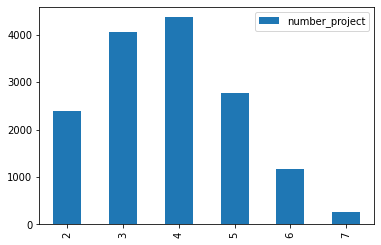

In [64]:
projects.plot(kind='bar')

In [70]:
projects

,number_project,project_score_count
4,4365,409
3,4055,72
5,2761,612
2,2388,1567
6,1174,655
7,256,256


In [68]:
projects['project_score_count'] = projects_count

<AxesSubplot:>

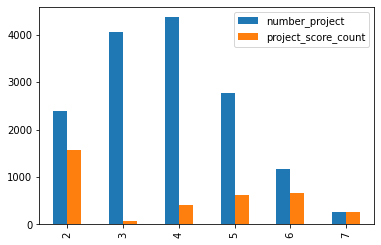

In [69]:
projects.plot(kind='bar')

In [71]:
projects['Percentage']=(projects['project_score_count']/projects['number_project'])*100
projects.sort_values(by='Percentage',ascending=False)

,number_project,project_score_count,Percentage
7,256,256,100.000000
2,2388,1567,65.619765
6,1174,655,55.792164
5,2761,612,22.165882
4,4365,409,9.369989
3,4055,72,1.775586


# From the above data we can infer that the people with 7 projects have all left the company with 100% followed by people with 2 projects with 65%

In [75]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,Rating 3,Eval Score 5,2,157,3,0,1,0,sales,low
1,Rating 8,Eval Score 8,5,262,6,0,1,0,sales,medium
2,Rating 1,Eval Score 8,7,272,4,0,1,0,sales,medium
3,Rating 7,Eval Score 8,5,223,5,0,1,0,sales,low
4,Rating 3,Eval Score 5,2,159,3,0,1,0,sales,low


In [78]:
df['promotion_last_5years'].value_counts()

0    14680
1      319
Name: promotion_last_5years, dtype: int64

In [79]:
df['promotion_last_5years'].where(df['left'] == 1).value_counts()

0.0    3552
1.0      19
Name: promotion_last_5years, dtype: int64

In [80]:
promotion_yes = df[df['promotion_last_5years'] == 1]
promotion_no = df[df['promotion_last_5years'] == 0]
promotion = df['promotion_last_5years'].value_counts().to_frame()
promotion

,promotion_last_5years
0,14680
1,319


In [ ]:
promotion_count=[]
promotion_count.append(six_projects[six_projects['left']== 1 ].count()[1])
promotion_count.append(five_projects[five_projects['left']== 1 ].count()[1])

In [81]:
(promotion_yes[promotion_yes['left']== 1 ].count()[1])

19